In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import os
import cv2
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as K
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
# Input data files are available in the read-only "../input/" directory
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

100% 428M/429M [00:21<00:00, 22.5MB/s]
100% 429M/429M [00:21<00:00, 20.7MB/s]


In [4]:
! unzip ravdess-emotional-speech-audio.zip

Archive:  ravdess-emotional-speech-audio.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  inflating: Actor_01/03

In [5]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

100% 426M/428M [00:21<00:00, 24.0MB/s]
100% 428M/428M [00:21<00:00, 21.2MB/s]


In [6]:
ravdess = '/content/audio_speech_actors_01-24'

In [7]:
! unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [8]:
toronto = '/content/TESS Toronto emotional speech set data'

In [9]:
!pip install librosa


In [10]:
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [11]:
import librosa

# Provide the path to your audio file
audio_path = '/content/Actor_03/03-01-01-01-01-01-03.wav'

# Load the audio file
y, sr = librosa.load(audio_path)

# Print the audio signal and the sampling rate
print("Audio signal:", y)
print("Sampling rate:", sr)



Audio signal: [-1.5090076e-05 -1.3444189e-05  6.9665953e-07 ...  3.8476814e-05
 -7.3732022e-06  4.1986523e-06]
Sampling rate: 22050


In [12]:
len(y)

75781

**Audio Signal (y)**: This represents the audio data as a one-dimensional NumPy array. Each value in the array corresponds to the amplitude of the audio signal at a specific point in time. The values are typically represented as floats or ints.

**Sampling Rate (sr)**: This is the number of samples per second used to represent the audio signal. It is commonly measured in Hertz (Hz). The sampling rate determines the quality and frequency range of the audio signal that can be accurately captured. Higher sampling rates allow for the representation of higher frequencies and better fidelity, but they also result in larger file sizes.

In [13]:
dictio = {'01':'neutral', '02':'calm', '03':'happy', '04':'sad', '05':'angry', '06':'fear', '07':'disgust', '08':'surprise'}

In [14]:
os.listdir(ravdess +'/'+ os.listdir(ravdess)[1])[0].split('.')[0].split('-')[2]

'04'

In [15]:
paths = []
label = []
for dir in os.listdir(ravdess):
  for f in os.listdir(ravdess                                                                                                                                + '/' + dir):
    paths.append(ravdess + '/' + dir + '/' + f)
    label.append(f.split('.')[0].split('-')[2])

In [16]:
path_df = pd.DataFrame(paths, columns=['paths'])
label = pd.DataFrame(label, columns=['labels'])
Ravdess_df = pd.concat([path_df , label], axis=1)
Ravdess_df.labels.replace(dictio, inplace=True)

In [17]:
Ravdess_df['labels'] = Ravdess_df['labels'].apply(lambda x: x.lower())

In [18]:
Ravdess_df

,paths,labels
0,/content/audio_speech_actors_01-24/Actor_19/03...,angry
1,/content/audio_speech_actors_01-24/Actor_19/03...,disgust
2,/content/audio_speech_actors_01-24/Actor_19/03...,fear
3,/content/audio_speech_actors_01-24/Actor_19/03...,sad
4,/content/audio_speech_actors_01-24/Actor_19/03...,fear
...,...,...
1435,/content/audio_speech_actors_01-24/Actor_08/03...,surprise
1436,/content/audio_speech_actors_01-24/Actor_08/03...,happy
1437,/content/audio_speech_actors_01-24/Actor_08/03...,angry
1438,/content/audio_speech_actors_01-24/Actor_08/03...,sad


In [19]:
import seaborn as sns

In [20]:
os.listdir(toronto)

['OAF_angry',
 'OAF_disgust',
 'YAF_sad',
 'YAF_neutral',
 'OAF_Fear',
 'YAF_fear',
 'YAF_angry',
 'OAF_Sad',
 'OAF_Pleasant_surprise',
 'OAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_happy',
 'OAF_happy',
 'YAF_disgust']

In [21]:
x = []
y = []
for dir in os.listdir(toronto):
  label = dir.split('_')[1]
  for fil in os.listdir(toronto + '/' + dir):
    x.append(toronto + '/' + dir + '/' + fil)
    y.append(label)

In [22]:
path_df = pd.DataFrame(x, columns=['paths'])
label = pd.DataFrame(y, columns=['labels'])
toronto_df = pd.concat([path_df , label], axis=1)
toronto_df.labels.replace({'Pleasant' : 'surprise' , 'pleasant' : 'surprise'}, inplace=True)

In [23]:
toronto_df['labels'] = toronto_df['labels'].apply(lambda x: x.lower())

In [24]:
toronto_df

,paths,labels
0,/content/TESS Toronto emotional speech set dat...,angry
1,/content/TESS Toronto emotional speech set dat...,angry
2,/content/TESS Toronto emotional speech set dat...,angry
3,/content/TESS Toronto emotional speech set dat...,angry
4,/content/TESS Toronto emotional speech set dat...,angry
...,...,...
2795,/content/TESS Toronto emotional speech set dat...,disgust
2796,/content/TESS Toronto emotional speech set dat...,disgust
2797,/content/TESS Toronto emotional speech set dat...,disgust
2798,/content/TESS Toronto emotional speech set dat...,disgust


In [25]:
df = pd.concat([Ravdess_df , toronto_df], axis=0 , ignore_index = True)

In [26]:
df

,paths,labels
0,/content/audio_speech_actors_01-24/Actor_19/03...,angry
1,/content/audio_speech_actors_01-24/Actor_19/03...,disgust
2,/content/audio_speech_actors_01-24/Actor_19/03...,fear
3,/content/audio_speech_actors_01-24/Actor_19/03...,sad
4,/content/audio_speech_actors_01-24/Actor_19/03...,fear
...,...,...
4235,/content/TESS Toronto emotional speech set dat...,disgust
4236,/content/TESS Toronto emotional speech set dat...,disgust
4237,/content/TESS Toronto emotional speech set dat...,disgust
4238,/content/TESS Toronto emotional speech set dat...,disgust


In [27]:
df.labels.unique()

array(['angry', 'disgust', 'fear', 'sad', 'calm', 'surprise', 'happy',
       'neutral'], dtype=object)

Text(0.5, 0, 'Emotions')

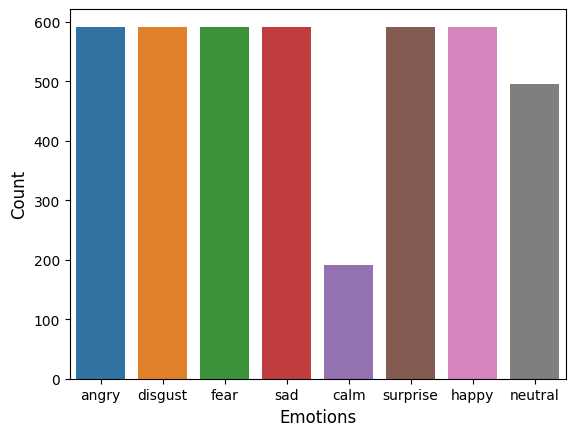

In [28]:
sns.countplot(x='labels', data=df)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)

In [29]:
def wave_info(path , emotion):
  y, sr = librosa.load(path)
  plt.figure(figsize=(14, 5))
  plt.plot(y)
  plt.title('Waveform')
  plt.show()
  X = librosa.stft(y)
  Xdb = librosa.amplitude_to_db(abs(X))
  plt.figure(figsize=(12, 3))
  plt.title('Spectrogram for audio with {} emotion'.format(emotion), size=15)
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
  plt.colorbar()




In [30]:
Audio(df.paths[0])

# Happy


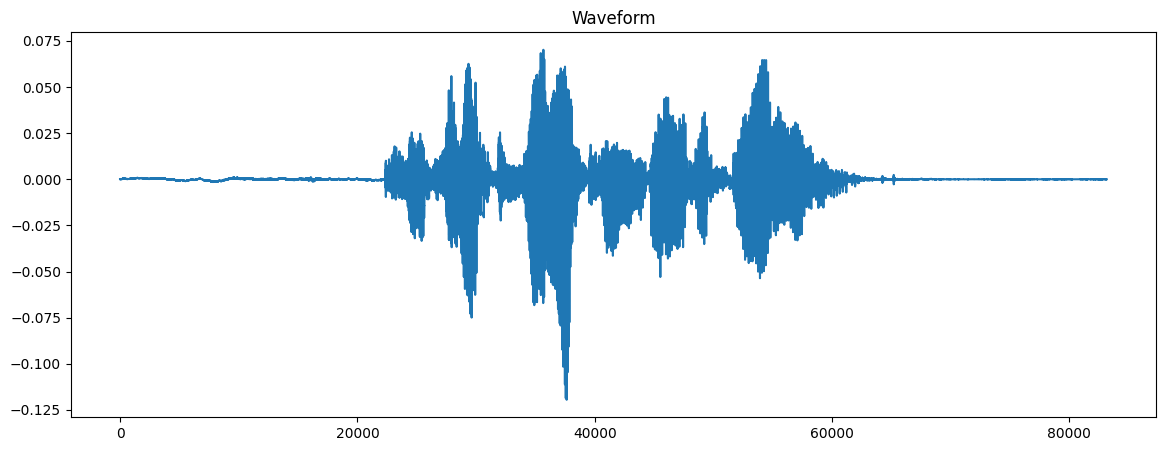

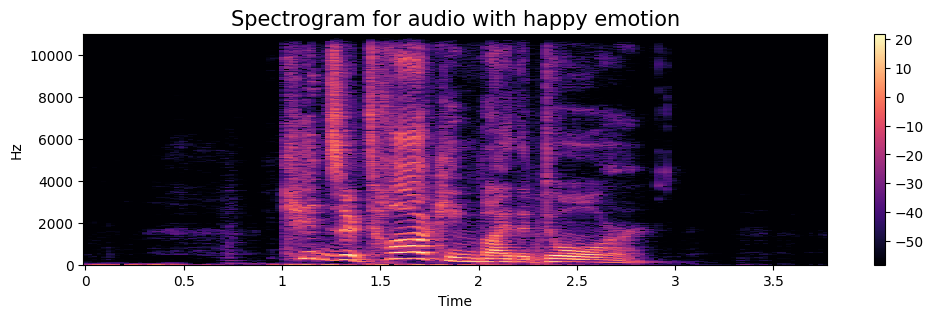

In [31]:
wave_info(np.array(df.paths[df.labels == 'happy'])[0] , 'happy')

# Angry

In [32]:
Audio(np.array(df.paths[df.labels == 'angry'])[0])

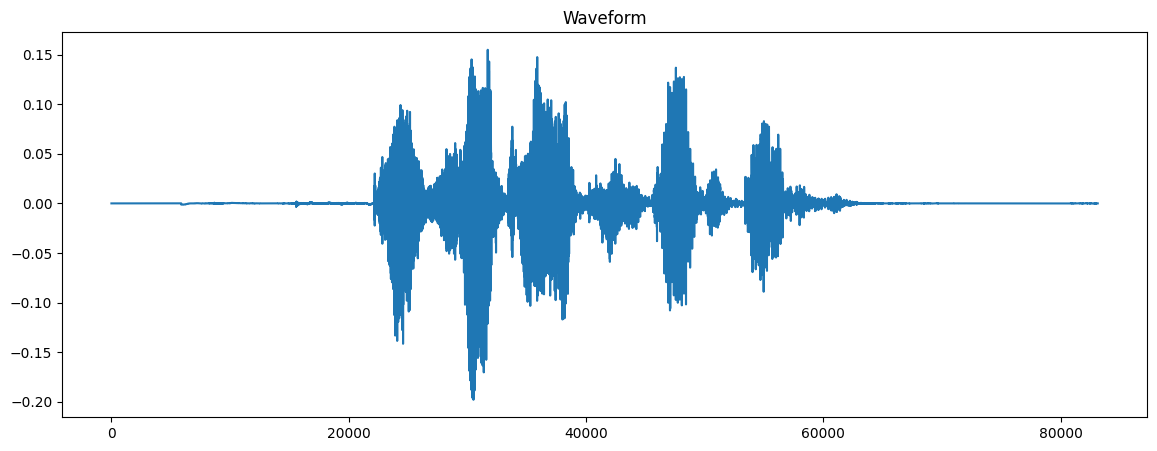

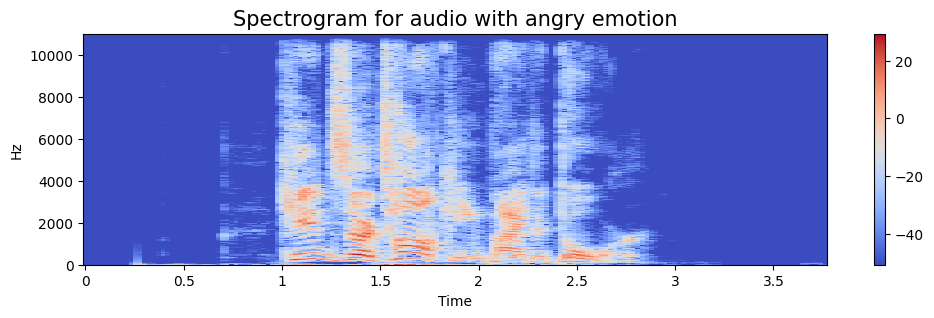

In [33]:
wave_info(np.array(df.paths[df.labels == 'angry'])[0] , 'angry')

# Data augmentation

In [34]:
class AudioProcessor:
    def __init__(self, path):
        self.data, self.sample_rate = librosa.load(path)

    def noise(self):
        noise_amp = 0.035 * np.random.uniform() * np.amax(self.data)
        data = self.data + noise_amp * np.random.normal(size=self.data.shape[0])
        return data

    def stretch(self, rate=0.8):
        return librosa.effects.time_stretch(self.data, rate = rate)

    def shift(self):
        shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
        return np.roll(self.data, shift_range)



    def plot_audio(self):
        # Create Audio instances for each processed audio
        original_audio = Audio(data=self.data, rate=self.sample_rate, autoplay=False)
        noise_audio = Audio(data=self.noise(), rate=self.sample_rate, autoplay=False)
        stretch_audio = Audio(data=self.stretch(), rate=self.sample_rate, autoplay=False)
        shift_audio = Audio(data=self.shift(), rate=self.sample_rate, autoplay=False)


        # Display the Audio widgets
        display(original_audio)
        display(noise_audio)
        display(stretch_audio)
        display(shift_audio)





In [35]:
path = np.array(df.paths[df.labels == 'angry'])[0]
processor = AudioProcessor(path)
processor.plot_audio()

In [36]:
class FeatureExtractor(AudioProcessor):
    def extract_features(self, data):
        result = np.array([])
        zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
        result = np.hstack((result, zcr))  # stacking horizontally

        stft = np.abs(librosa.stft(data))
        chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=self.sample_rate).T, axis=0)
        result = np.hstack((result, chroma_stft))  # stacking horizontally

        mfcc = np.mean(librosa.feature.mfcc(y=data, sr=self.sample_rate).T, axis=0)
        result = np.hstack((result, mfcc))  # stacking horizontally

        rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
        result = np.hstack((result, rms))  # stacking horizontally

        mel = np.mean(librosa.feature.melspectrogram(y=data, sr=self.sample_rate).T, axis=0)
        result = np.hstack((result, mel))  # stacking horizontally

        return result

    def get_features(self):
        result = self.extract_features(self.data)

        noise_data = self.noise()
        res2 = self.extract_features(noise_data)
        result = np.vstack((result, res2))  # stacking vertically

        new_data = self.stretch()
        res3 = self.extract_features(new_data)
        result = np.vstack((result, res3))  # stacking vertically

        return result

# Example usage

processor = FeatureExtractor(path)
features = processor.get_features()
print(features)

[[ 2.05542442e-01  5.85660398e-01  6.07021332e-01  6.73532486e-01
   6.84499979e-01  6.78281724e-01  6.85195565e-01  6.75189257e-01
   6.53403699e-01  6.77345574e-01  6.37680769e-01  6.07106209e-01
   6.08833611e-01 -5.27407532e+02  4.79862976e+01 -5.80647755e+00
   1.28593121e+01 -9.20441970e-02 -1.00746429e+00 -2.67186236e+00
  -4.15937376e+00 -9.20355797e+00 -3.96341681e+00  4.69465351e+00
  -5.43374205e+00 -8.25075284e-02 -8.54590476e-01 -3.51212454e+00
   9.56296325e-01 -2.35643029e+00 -1.07292366e+00 -2.14171149e-02
  -1.27268410e+00  9.85682569e-03  5.64981066e-02  1.12816517e-03
   1.33546616e-03  4.36483975e-03  3.86535712e-02  9.77029949e-02
   9.32890475e-02  8.21948498e-02  2.39790767e-01  3.66520405e-01
   2.63289213e-01  1.52843878e-01  8.56428891e-02  4.12284173e-02
   1.43998370e-01  2.64874190e-01  1.85416773e-01  3.70975256e-01
   8.07780743e-01  3.81808639e-01  7.70591572e-02  7.00488463e-02
   1.57805219e-01  2.41756469e-01  1.13867424e-01  1.31397456e-01
   9.44399

In [37]:
features.shape

(3, 162)

In [38]:
X, Y = [], []
for path, emotion in zip(df.paths, df.labels):
    processor = FeatureExtractor(path)
    features = processor.get_features()
    for ele in features:
        X.append(ele)
        Y.append(emotion)

In [51]:
len(X), len(Y)

(12720, 12720)

In [39]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.205542,0.585660,0.607021,0.673532,0.684500,0.678282,0.685196,0.675189,0.653404,0.677346,...,0.000213,0.000295,0.000262,0.000202,0.000241,0.000303,0.000268,0.000158,0.000014,angry
1,0.365357,0.776843,0.796784,0.828023,0.836574,0.834434,0.771054,0.712830,0.723945,0.748200,...,0.001085,0.001137,0.001118,0.001055,0.001145,0.001196,0.001168,0.001036,0.000884,angry
2,0.128247,0.583070,0.654980,0.698980,0.676729,0.687637,0.693251,0.656281,0.673526,0.659092,...,0.000095,0.000132,0.000126,0.000102,0.000115,0.000145,0.000143,0.000081,0.000006,angry
3,0.199216,0.697497,0.684724,0.732904,0.755484,0.707953,0.672531,0.698906,0.716398,0.730262,...,0.000012,0.000015,0.000015,0.000022,0.000027,0.000030,0.000035,0.000026,0.000002,disgust
4,0.347018,0.792536,0.800008,0.837291,0.840454,0.811034,0.740072,0.708414,0.741962,0.764195,...,0.000076,0.000079,0.000076,0.000083,0.000092,0.000096,0.000100,0.000092,0.000070,disgust


In [53]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [56]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [57]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9540, 162), (9540, 8), (3180, 162), (3180, 8))

In [58]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9540, 162, 1), (9540, 8), (3180, 162, 1), (3180, 8))

In [59]:
x_train.shape[1:]

(162, 1)

In [65]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Define input shape
input_shape = x_train.shape[1:]

# Input layer
input_layer = Input(shape=input_shape)

# Convolutional layers
conv1 = Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=5, strides=2, padding='same')(conv1)
batch_norm1 = BatchNormalization()(pool1)

conv2 = Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu')(batch_norm1)
pool2 = MaxPooling1D(pool_size=5, strides=2, padding='same')(conv2)
batch_norm2 = BatchNormalization()(pool2)

conv3 = Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu')(batch_norm2)
pool3 = MaxPooling1D(pool_size=5, strides=2, padding='same')(conv3)
dropout1 = Dropout(0.2)(pool3)

conv4 = Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu')(dropout1)
pool4 = MaxPooling1D(pool_size=5, strides=2, padding='same')(conv4)
batch_norm3 = BatchNormalization()(pool4)

# Flatten layer
flatten = Flatten()(batch_norm3)

# Dense layers
dense1 = Dense(32, activation='relu')(flatten)
batch_norm4 = BatchNormalization()(dense1)
dropout2 = Dropout(0.3)(batch_norm4)

# Output layer
output_layer = Dense(8, activation='softmax')(dropout2)

# Create model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the ReduceLROnPlateau callback
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=1, patience=2, min_lr=0.0000001)

# Train the model with the ReduceLROnPlateau callback
history = model.fit(x_train, y_train, batch_size=64, epochs=50,
                    validation_data=(x_test, y_test), callbacks=[rlrp])


Epoch 1/50
150/150 [==============================] - 8s 17ms/step - loss: 1.6727 - accuracy: 0.4018 - val_loss: 1.6412 - val_accuracy: 0.4846 - lr: 0.0010
Epoch 2/50
150/150 [==============================] - 3s 17ms/step - loss: 1.1764 - accuracy: 0.6069 - val_loss: 1.1763 - val_accuracy: 0.6097 - lr: 0.0010
Epoch 3/50
150/150 [==============================] - 2s 14ms/step - loss: 0.9388 - accuracy: 0.6782 - val_loss: 2.3354 - val_accuracy: 0.3255 - lr: 0.0010
Epoch 4/50
150/150 [==============================] - 2s 15ms/step - loss: 0.9088 - accuracy: 0.6797 - val_loss: 1.8558 - val_accuracy: 0.4047 - lr: 0.0010
Epoch 5/50
150/150 [==============================] - 2s 14ms/step - loss: 0.7948 - accuracy: 0.7219 - val_loss: 1.5236 - val_accuracy: 0.5135 - lr: 0.0010
Epoch 6/50
150/150 [==============================] - 2s 14ms/step - loss: 0.7524 - accuracy: 0.7346 - val_loss: 0.8575 - val_accuracy: 0.6981 - lr: 0.0010
Epoch 7/50
150/150 [==============================] - 2s 14ms/st

100/100 [==============================] - 1s 7ms/step - loss: 0.2846 - accuracy: 0.9009
Accuracy of our model on test data :  90.0943398475647 %


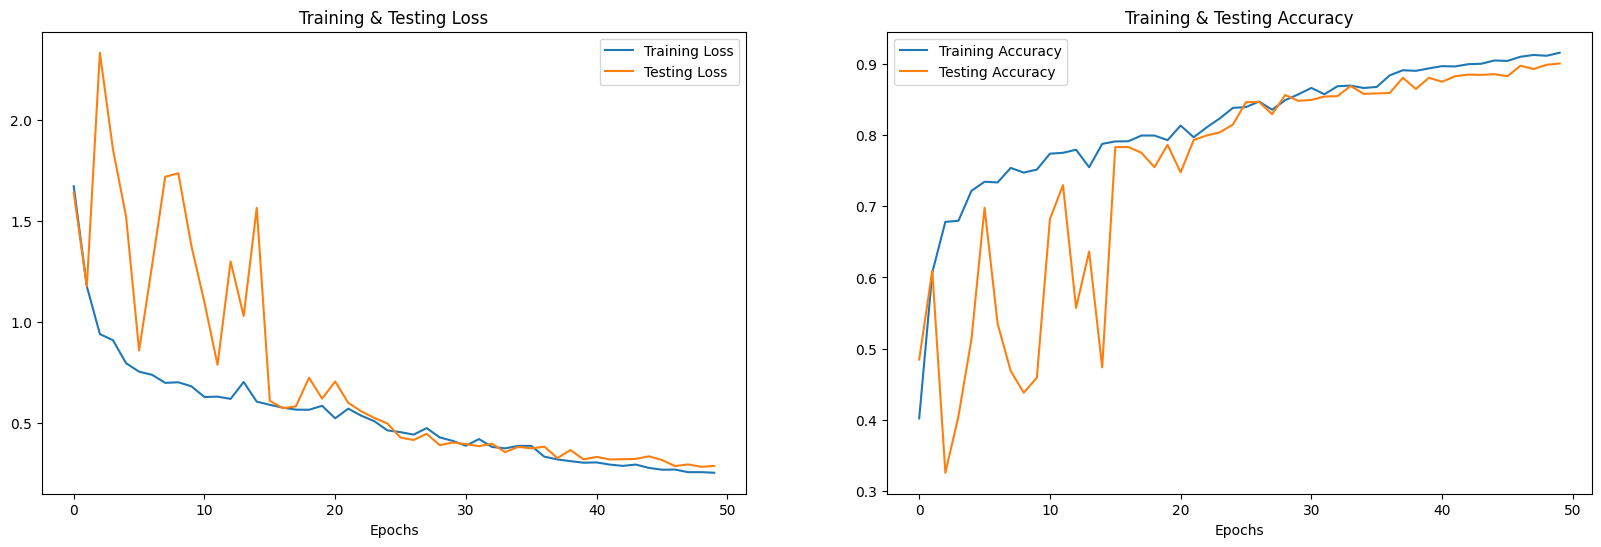

In [66]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [69]:
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)
y_test = encoder.inverse_transform(y_test)

100/100 [==============================] - 1s 7ms/step


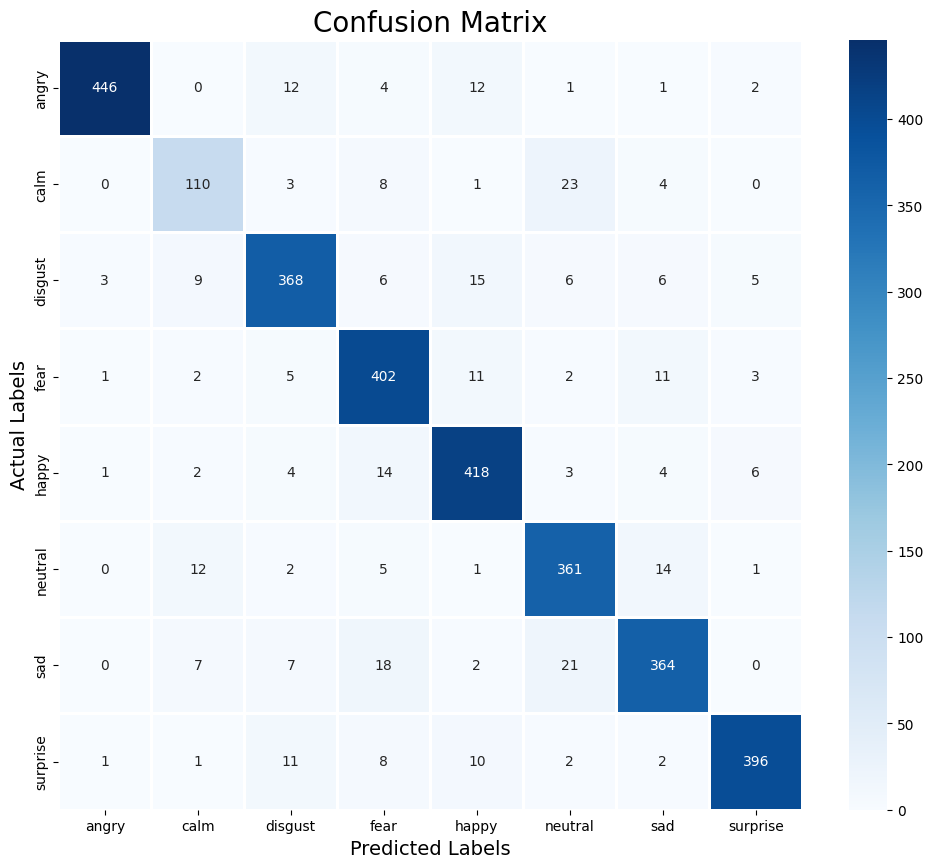

In [71]:
cm = confusion_matrix(y_test, y_pred)

# Creating a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=encoder.categories_, columns=encoder.categories_)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cm_df, annot=True, fmt='', cmap='Blues', linewidths=1, linecolor='white')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.99      0.93      0.96       478
        calm       0.77      0.74      0.75       149
     disgust       0.89      0.88      0.89       418
        fear       0.86      0.92      0.89       437
       happy       0.89      0.92      0.91       452
     neutral       0.86      0.91      0.89       396
         sad       0.90      0.87      0.88       419
    surprise       0.96      0.92      0.94       431

    accuracy                           0.90      3180
   macro avg       0.89      0.89      0.89      3180
weighted avg       0.90      0.90      0.90      3180

